# Yelp Data Challenge - Data Preprocessing

## Weiwei Ouyang oyww710@gmail.com

## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

Notes on the Dataset

    Each file is composed of a single object type, one json-object per-line.
    Take a look at some examples to get you started: https://github.com/Yelp/dataset-examples.



## Read data from file and load to Pandas DataFrame

**Warning**: Loading all the 1.8 GB data into Pandas at a time takes long time and a lot of memory!

In [1]:
import json
import pandas as pd

In [2]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'business.json',
    'checkin.json',
    'review.json',
    'tip.json',
    'user.json'
]

#### Business Data

In [51]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [52]:
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA


In [53]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 15 columns):
address         174567 non-null object
attributes      174567 non-null object
business_id     174567 non-null object
categories      174567 non-null object
city            174567 non-null object
hours           174567 non-null object
is_open         174567 non-null int64
latitude        174566 non-null float64
longitude       174566 non-null float64
name            174567 non-null object
neighborhood    174567 non-null object
postal_code     174567 non-null object
review_count    174567 non-null int64
stars           174567 non-null float64
state           174567 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 20.0+ MB


#### Checkin Data

In [5]:
with open(file_checkin) as f:
    df_checkin = pd.DataFrame(json.loads(line) for line in f)
df_checkin.head(2)


,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Thursday': {'21:00': 4, '1:00': 1, '4:00': 1..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Monday': {'13:00': 1}, 'Thursday': {'20:00':..."


In [6]:
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146350 entries, 0 to 146349
Data columns (total 2 columns):
business_id    146350 non-null object
time           146350 non-null object
dtypes: object(2)
memory usage: 2.2+ MB


#### Review Data

In [7]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw


In [8]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261669 entries, 0 to 5261668
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


#### Tip Data

In [9]:
with open(file_tip) as f:
    df_tip = pd.DataFrame(json.loads(line) for line in f)
df_tip.head(5)

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw
3,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,0,Happy hour 5-7 Monday - Friday,ulQ8Nyj7jCUR8M83SUMoRQ
4,ESzO3Av0b1_TzKOiqzbQYQ,2017-01-28,0,"Parking is a premium, keep circling, you will ...",ulQ8Nyj7jCUR8M83SUMoRQ


In [10]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098325 entries, 0 to 1098324
Data columns (total 5 columns):
business_id    1098325 non-null object
date           1098325 non-null object
likes          1098325 non-null int64
text           1098325 non-null object
user_id        1098325 non-null object
dtypes: int64(1), object(4)
memory usage: 41.9+ MB


#### User Data

In [11]:
with open(file_user) as f:
     df_user = pd.DataFrame(json.loads(line) for line in f)

In [12]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326101 entries, 0 to 1326100
Data columns (total 22 columns):
average_stars         1326101 non-null float64
compliment_cool       1326101 non-null int64
compliment_cute       1326101 non-null int64
compliment_funny      1326101 non-null int64
compliment_hot        1326101 non-null int64
compliment_list       1326101 non-null int64
compliment_more       1326101 non-null int64
compliment_note       1326101 non-null int64
compliment_photos     1326101 non-null int64
compliment_plain      1326101 non-null int64
compliment_profile    1326101 non-null int64
compliment_writer     1326101 non-null int64
cool                  1326101 non-null int64
elite                 1326101 non-null object
fans                  1326101 non-null int64
friends               1326101 non-null object
funny                 1326101 non-null int64
name                  1326101 non-null object
review_count          1326101 non-null int64
useful                13261

In [13]:
df_user.head(3)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.67,0,0,0,0,0,0,0,0,1,...,0,[],0,"[cvVMmlU1ouS3I5fhutaryQ, nj6UZ8tdGo8YJ9lUMTVWN...",0,Johnny,8,0,oMy_rEb0UBEmMlu-zcxnoQ,2014-11-03
1,3.70,0,0,0,0,0,0,0,0,0,...,0,[],0,"[0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gp...",0,Chris,10,0,JJ-aSuM4pCFPdkfoZ34q0Q,2013-09-24
2,2.00,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Tiffy,1,0,uUzsFQn_6cXDh6rPNGbIFA,2017-03-02


## Filter data by city and category

#### Create filters/masks

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category (You may need to filter null categories first)

In [54]:
# Create Pandas DataFrame filters and name it df_filtered
df_filtered=df_business[df_business.city=='Las Vegas']
df_filtered=df_filtered[df_filtered.categories.apply(lambda x: 'Restaurants' in x)]
df_filtered.head(5)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
52,6730 S Las Vegas Blvd,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",Pd52CjgyEU3Rb8co6QfTPw,"[Nightlife, Bars, Barbeque, Sports Bars, Ameri...",Las Vegas,"{'Monday': '8:30-22:30', 'Tuesday': '8:30-22:3...",1,36.066914,-115.170848,Flight Deck Bar & Grill,Southeast,89119,13,4.0,NV
53,"6889 S Eastern Ave, Ste 101","{'GoodForMeal': {'dessert': False, 'latenight'...",4srfPk1s8nlm1YusyDUbjg,"[Fast Food, Restaurants, Sandwiches]",Las Vegas,{},1,36.064652,-115.118954,Subway,Southeast,89119,6,2.5,NV
54,"6587 Las Vegas Blvd S, Ste 171","{'RestaurantsTableService': True, 'GoodForMeal...",n7V4cD-KqqE3OXk0irJTyA,"[Arcades, Arts & Entertainment, Gastropubs, Re...",Las Vegas,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,36.068259,-115.178877,GameWorks,Southeast,89119,349,3.0,NV
91,"4250 S Rainbow Blvd, Ste 1007","{'GoodForMeal': {'dessert': False, 'latenight'...",F0fEKpTk7gAmuSFI0KW1eQ,"[Italian, Restaurants]",Las Vegas,{},0,36.111057,-115.241688,Cafe Mastrioni,Spring Valley,89103,3,1.5,NV
122,3020 E Desert Inn Rd,"{'RestaurantsTableService': False, 'GoodForMea...",Wpt0sFHcPtV5MO9He7yMKQ,"[Restaurants, Fast Food, Burgers]",Las Vegas,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,36.130013,-115.109310,McDonald's,Eastside,89121,20,2.0,NV


#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [57]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [59]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business=df_filtered[selected_features]
df_selected_business.head(2)

,business_id,name,categories,stars
52,Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,"[Nightlife, Bars, Barbeque, Sports Bars, Ameri...",4.0
53,4srfPk1s8nlm1YusyDUbjg,Subway,"[Fast Food, Restaurants, Sandwiches]",2.5


In [64]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.columns.stars = ['avg_stars']

In [67]:
# Inspect your DataFrame
df_selected_business.head(2)
df_selected_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5899 entries, 52 to 174469
Data columns (total 4 columns):
business_id    5899 non-null object
name           5899 non-null object
categories     5899 non-null object
avg_stars      5899 non-null float64
dtypes: float64(1), object(3)
memory usage: 230.4+ KB


#### Save results to csv files

In [69]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv('selected_business.csv', encoding='utf-8', index=False)

In [70]:
# Try reload the csv file to check if everything works fine
df_selected_business_load=pd.read_csv("selected_business.csv")
df_selected_business_load.head(5)

,business_id,name,categories,avg_stars
0,Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,"['Nightlife', 'Bars', 'Barbeque', 'Sports Bars...",4.0
1,4srfPk1s8nlm1YusyDUbjg,Subway,"['Fast Food', 'Restaurants', 'Sandwiches']",2.5
2,n7V4cD-KqqE3OXk0irJTyA,GameWorks,"['Arcades', 'Arts & Entertainment', 'Gastropub...",3.0
3,F0fEKpTk7gAmuSFI0KW1eQ,Cafe Mastrioni,"['Italian', 'Restaurants']",1.5
4,Wpt0sFHcPtV5MO9He7yMKQ,McDonald's,"['Restaurants', 'Fast Food', 'Burgers']",2.0


### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Prepare dataframes to be joined, - on business_id

In [74]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')
df_left.head(5)

,name,categories,avg_stars
business_id,,,
Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,"[Nightlife, Bars, Barbeque, Sports Bars, Ameri...",4.0
4srfPk1s8nlm1YusyDUbjg,Subway,"[Fast Food, Restaurants, Sandwiches]",2.5
n7V4cD-KqqE3OXk0irJTyA,GameWorks,"[Arcades, Arts & Entertainment, Gastropubs, Re...",3.0
F0fEKpTk7gAmuSFI0KW1eQ,Cafe Mastrioni,"[Italian, Restaurants]",1.5
Wpt0sFHcPtV5MO9He7yMKQ,McDonald's,"[Restaurants, Fast Food, Burgers]",2.0


In [75]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right=df_review.set_index('business_id')
df_right.head(5)


,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,
0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw
VR6GpWIda3SfvPC-lg9H3w,0,2016-05-28,0,n6QzIUObkYshz4dz2QRJTw,5,Small unassuming place that changes their menu...,0,bv2nCi5Qv5vroFiqKGopiw
CKC0-MOWMqoeWf6s-szl8g,0,2016-05-28,0,MV3CcKScW05u5LVfF6ok0g,5,Lester's is located in a beautiful neighborhoo...,0,bv2nCi5Qv5vroFiqKGopiw
ACFtxLv8pGrrxMm6EgjreA,0,2016-05-28,0,IXvOzsEMYtiJI0CARmj77Q,4,Love coming here. Yes the place always needs t...,0,bv2nCi5Qv5vroFiqKGopiw


In [79]:
#Delete data to save more space
import gc
gc.collect()
df_review=pd.DataFrame()
df_selected_business=pd.DataFrame()
df_filtered=pd.DataFrame()
df_business=pd.DataFrame()

#### Join! and reset index

In [89]:
# Join df_left and df_right. It should be left join
df=df_left.join(df_right)
gc.collect()
df_left=pd.DataFrame()
df_right=pd.DataFrame()

In [90]:
# You may want to reset the index 
df=df.reset_index()
df.head(5)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2011-08-24,0,KEAHrqN-1DV0gmuNHM6Eww,5,As part of a birthday celebration weekend for ...,1,xP1IYu2eGfxMWV9tjrurIw
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2015-06-29,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2015-03-16,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,8,2011-12-20,7,Jjz9W-wBkoBoMcB8ZQs5zQ,5,We had early reservations for a party of 9 for...,9,9bxdPvAhP6cuipD5s2UnCg


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929606 entries, 0 to 929605
Data columns (total 12 columns):
business_id    929606 non-null object
name           929606 non-null object
categories     929606 non-null object
avg_stars      929606 non-null float64
cool           929606 non-null int64
date           929606 non-null object
funny          929606 non-null int64
review_id      929606 non-null object
stars          929606 non-null int64
text           929606 non-null object
useful         929606 non-null int64
user_id        929606 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 85.1+ MB


#### We further filter data by date, e.g. keep comments from last 2 years

* Otherwise your laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [93]:
# Make a filter that selects date after 2015-01-20
df['date'] = pd.to_datetime(df['date'])
df=df[df['date'] > '2015-01-20']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515752 entries, 1 to 929526
Data columns (total 12 columns):
business_id    515752 non-null object
name           515752 non-null object
categories     515752 non-null object
avg_stars      515752 non-null float64
cool           515752 non-null int64
date           515752 non-null datetime64[ns]
funny          515752 non-null int64
review_id      515752 non-null object
stars          515752 non-null int64
text           515752 non-null object
useful         515752 non-null int64
user_id        515752 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 51.2+ MB


In [96]:
# Filter the joined DataFrame and name it as df_final
df.head(5)
df_final=df
df=pd.DataFrame()

#### Take a glance at the final dataset

* Do more EDA here as you like!

In [104]:
import matplotlib.pyplot as plt

% matplotlib inline
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

In [102]:
#Check the final dataset
df_final.head(5)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2015-06-29,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2015-03-16,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA
5,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g
6,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g


There are  3395  different restaurants in Yelp!


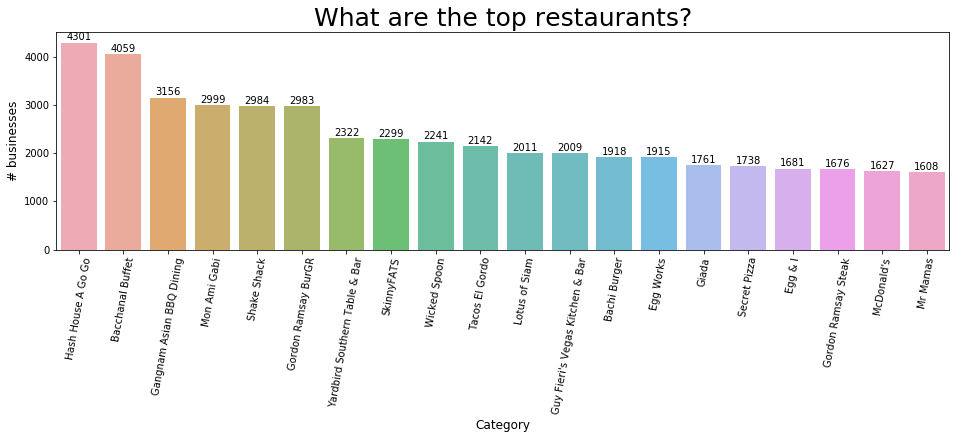

In [105]:
##Count the top 21 restaurants with most reviews after 2015-01-20
x=df_final.name.value_counts()
print("There are ",len(x)," different restaurants in Yelp!")
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top restaurants?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

## Save your preprocessed dataset to csv file

* Respect your laptop's hard work! You don't want to make it run everything again.

In [106]:
# Save to ./data/last_2_years_restaurant_reviews.csv for your next task
df_final.to_csv('last_2_years_restaurant_reviews.csv', encoding='utf-8', index=False)